In [3]:
%matplotlib inline
import matplotlib.pylab as plt
import xarray 
import pandas as pd
# import seaborn as sns

Open netCDF file with several variables inside:

In [5]:
f = xarray.open_dataset('./air.2m.gauss.2016.nc')

In [6]:
f

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, nbnds: 2, time: 366)
Coordinates:
  * lat        (lat) float32 88.542 86.6531 84.7532 82.8508 80.9473 79.0435 ...
  * lon        (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 ...
  * time       (time) datetime64[ns] 2016-01-01 2016-01-02 2016-01-03 ...
Dimensions without coordinates: nbnds
Data variables:
    air        (time, lat, lon) float64 248.5 248.4 248.5 248.4 248.4 248.4 ...
    time_bnds  (time, nbnds) float64 1.893e+06 1.893e+06 1.893e+06 1.893e+06 ...
Attributes:
    Conventions:    COARDS
    title:          mean daily NMC reanalysis (2014)
    history:        created 2013/12 by Hoop (netCDF2.3)
    description:    Data is from NMC initialized reanalysis\n(4x/day).  It co...
    platform:       Model
    References:     http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reana...
    dataset_title:  NCEP-NCAR Reanalysis 1

Mean over time

In [7]:
mmean = f.mean('time')

In [8]:
mmean

<xarray.Dataset>
Dimensions:    (lat: 94, lon: 192, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.542 86.6531 84.7532 82.8508 80.9473 79.0435 ...
  * lon        (lon) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 ...
Dimensions without coordinates: nbnds
Data variables:
    air        (lat, lon) float64 259.7 259.7 259.7 259.7 259.7 259.8 259.8 ...
    time_bnds  (nbnds) float64 1.898e+06 1.898e+06

In [9]:
mmean.air.shape

(94, 192)

Plot mean air temperature:

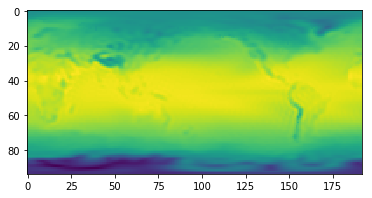

In [11]:
plt.imshow(mmean.air);

Create time series for northern and southernd hemispheres:

In [12]:
mmean.lat

<xarray.DataArray 'lat' (lat: 94)>
array([ 88.542   ,  86.653099,  84.753197,  82.8508  ,  80.947304,  79.043503,
        77.139397,  75.2351  ,  73.330704,  71.426201,  69.521698,  67.617104,
        65.712502,  63.807899,  61.903301,  59.9986  ,  58.093899,  56.189301,
        54.284599,  52.379902,  50.475201,  48.570499,  46.665798,  44.761101,
        42.8564  ,  40.951698,  39.047001,  37.1422  ,  35.237499,  33.332802,
        31.428101,  29.523399,  27.618601,  25.7139  ,  23.8092  ,  21.9044  ,
        19.999701,  18.094999,  16.190201,  14.2855  ,  12.3808  ,  10.47604 ,
         8.57131 ,   6.66657 ,   4.76184 ,   2.8571  ,   0.952368,  -0.952368,
        -2.8571  ,  -4.76184 ,  -6.66657 ,  -8.57131 , -10.47604 , -12.3808  ,
       -14.2855  , -16.190201, -18.094999, -19.999701, -21.9044  , -23.8092  ,
       -25.7139  , -27.618601, -29.523399, -31.428101, -33.332802, -35.237499,
       -37.1422  , -39.047001, -40.951698, -42.8564  , -44.761101, -46.665798,
       -48.570499

In [13]:
north = mmean.loc[dict(lat=slice(90,0))]

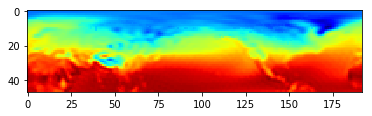

In [14]:
plt.imshow(north.air, cmap=plt.cm.jet)

In [16]:
south = mmean.loc[dict(lat=slice(0,-90))]

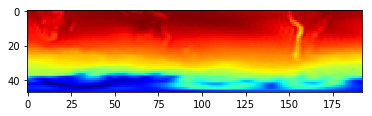

In [17]:
plt.imshow(south.air, cmap=plt.cm.jet)

In [18]:
north_tm = f.air.loc[dict(lat=slice(90,0))].mean(['lat','lon'])
south_tm = f.air.loc[dict(lat=slice(0,-90))].mean(['lat','lon'])

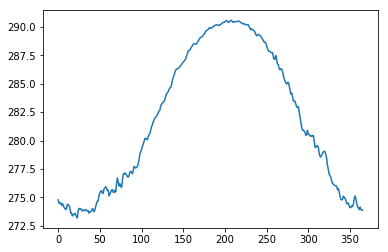

In [19]:
plt.plot(north_tm)

In [20]:
north_tm

<xarray.DataArray 'air' (time: 366)>
array([ 274.782278,  274.487312,  274.559943, ...,  273.946922,  273.867166,
        273.893307])
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 2016-01-02 2016-01-03 ...

In [21]:
dfn = north_tm.to_dataframe()
dfs = south_tm.to_dataframe()

In [22]:
df = pd.DataFrame(index=dfn.index)
df['north'] = dfn.air
df['south'] = dfs.air

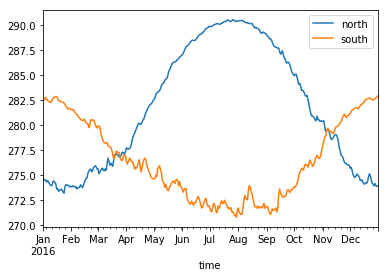

In [23]:
df.plot()

/Users/koldunovn/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=4,center=False).mean()
  """Entry point for launching an IPython kernel.


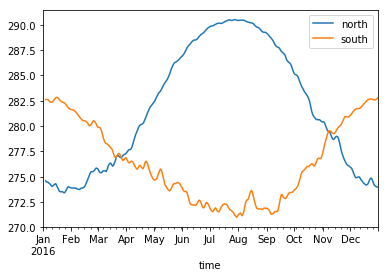

In [24]:
smoothed = pd.rolling_mean(df, 4)
smoothed.plot()

Convert back to xray Dataset:

In [26]:
tr = xarray.Dataset.from_dataframe(smoothed)

In [27]:
tr

<xarray.Dataset>
Dimensions:  (time: 366)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 2016-01-02 2016-01-03 ...
Data variables:
    north    (time) float64 nan nan nan 274.6 274.5 274.5 274.4 274.3 274.2 ...
    south    (time) float64 nan nan nan 282.6 282.6 282.6 282.6 282.5 282.4 ...

Save to netCDF file:

In [28]:
tr.to_netcdf('smoothed.nc')